In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install tf-keras
!pip install transformers
!pip install scikit-learn
!pip install pandas
!pip install imbalanced-learn
!pip install safetensors

In [ ]:
import pandas as pd
import os
from imblearn.over_sampling import RandomOverSampler

# ==============================================================================
# 1. KONFIGURASI PATH
# ==============================================================================
DATASET_DIR = 'dataset'
SAVED_MODELS_DIR = 'saved_models'
TRAIN_FILE = 'tamil_sentiment_full_train.csv'
OUTPUT_FILE = 'train_balanced_3class.csv' # ---> DIUBAH: Nama file output baru

input_path = os.path.join(DATASET_DIR, TRAIN_FILE)
output_path = os.path.join(DATASET_DIR, OUTPUT_FILE)

if not os.path.exists(DATASET_DIR):
    print(f"Error: Folder '{DATASET_DIR}' tidak ditemukan.")
    print("Pastikan Anda menjalankan skrip ini dari direktori yang benar.")
    exit()

# ==============================================================================
# 2. MEMUAT DATASET
# ==============================================================================
print(f"Membaca dataset dari: {input_path}")
try:
    df = pd.read_csv(
        input_path,
        sep='\t',
        header=None,
        names=['text', 'label'],
        on_bad_lines='warn'
    )
except FileNotFoundError:
    print(f"Error: File '{input_path}' tidak ditemukan.")
    exit()

print("\n--- 5 Baris Pertama Data Asli ---")
print(df.head())
print("\nUkuran data asli:", df.shape)

df.dropna(subset=['text', 'label'], inplace=True)
print("Ukuran data setelah menghapus nilai kosong:", df.shape)


# ==============================================================================
# 2.5. FILTER DAN MAP LABEL (BAGIAN BARU)
# ==============================================================================
print("\nMemfilter data untuk 3 kelas (Positive, Negative, Mixed_feelings)...")

# Daftar label yang ingin kita pertahankan
selected_labels = ['Positive', 'Negative', 'Mixed_feelings']
df = df[df['label'].isin(selected_labels)].copy() # .copy() untuk menghindari warning

print(f"Ukuran data setelah filtering: {df.shape}")

print("Mengubah label 'Mixed_feelings' menjadi 'Neutral'...")
df['label'] = df['label'].replace({'Mixed_feelings': 'Neutral'})

print("Pemetaan label selesai.")


# ==============================================================================
# 3. ANALISIS DISTRIBUSI KELAS AWAL (SEBELUM SAMPLING)
# ==============================================================================
print("\n" + "="*50)
print("ANALISIS DISTRIBUSI KELAS (SEBELUM RANDOM OVER SAMPLING)")
print("="*50)
print("Jumlah data per kelas:")
print(df['label'].value_counts())
print("\nProporsi data per kelas (%):")
print(df['label'].value_counts(normalize=True) * 100)
print("="*50)


# ==============================================================================
# 4. MENERAPKAN RANDOM OVER SAMPLING (ROS)
# ==============================================================================
print("\nMemisahkan fitur (X) dan label (y)...")
X = df[['text']]
y = df['label']

print("Menerapkan Random Over Sampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=['text'])
df_balanced['label'] = y_resampled

print("Proses ROS selesai.")
print("\nUkuran data setelah di-resample:", df_balanced.shape)


# ==============================================================================
# 5. ANALISIS DISTRIBUSI KELAS AKHIR (SETELAH SAMPLING)
# ==============================================================================
print("\n" + "="*50)
print("ANALISIS DISTRIBUSI KELAS (SETELAH RANDOM OVER SAMPLING)")
print("="*50)
print("Jumlah data per kelas:")
print(df_balanced['label'].value_counts())
print("\nProporsi data per kelas (%):")
print(df_balanced['label'].value_counts(normalize=True) * 100)
print("="*50)


# ==============================================================================
# 6. MENYIMPAN DATA BERSIH
# ==============================================================================
print(f"\nMenyimpan data yang sudah seimbang ke: {output_path}")
df_balanced.to_csv(output_path, index=False, encoding='utf-8')

print("\n🎉 Skrip persiapan data selesai dijalankan!")
print(f"Data latih yang seimbang kini siap digunakan di '{output_path}'.")

Membaca dataset dari: /content/drive/My Drive/Program_NLP/dataset/tamil_sentiment_full_train.csv


/tmp/ipython-input-2250136308.py:26: ParserWarning: Skipping line 36: expected 2 fields, saw 3
Skipping line 527: expected 2 fields, saw 3
Skipping line 1933: expected 2 fields, saw 4
Skipping line 2002: expected 2 fields, saw 3
Skipping line 2271: expected 2 fields, saw 3
Skipping line 4043: expected 2 fields, saw 3
Skipping line 4792: expected 2 fields, saw 3
Skipping line 5853: expected 2 fields, saw 3
Skipping line 6301: expected 2 fields, saw 3
Skipping line 9279: expected 2 fields, saw 3
Skipping line 10560: expected 2 fields, saw 3
Skipping line 11268: expected 2 fields, saw 3
Skipping line 11283: expected 2 fields, saw 3
Skipping line 13831: expected 2 fields, saw 3
Skipping line 14992: expected 2 fields, saw 3
Skipping line 17834: expected 2 fields, saw 3
Skipping line 17838: expected 2 fields, saw 3
Skipping line 20031: expected 2 fields, saw 4
Skipping line 20215: expected 2 fields, saw 3
Skipping line 20372: expected 2 fields, saw 3
Skipping line 22204: expected 2 fields, s


--- 5 Baris Pertama Data Asli ---
                                                text          label
0              First like button vijay setupati fans  unknown_state
1         Vetri ne dhanusha pudiche thongitu iru....       Positive
2  Ithu romba naal ku munnadi Short film'a pathat...       Positive
3               Trending no1 in srilanka.... june 16       Positive
4                      Maja thala marana  mass thala       Positive

Ukuran data asli: (35192, 2)
Ukuran data setelah menghapus nilai kosong: (35192, 2)

Memfilter data untuk 3 kelas (Positive, Negative, Mixed_feelings)...
Ukuran data setelah filtering: (27967, 2)
Mengubah label 'Mixed_feelings' menjadi 'Neutral'...
Pemetaan label selesai.

ANALISIS DISTRIBUSI KELAS (SEBELUM RANDOM OVER SAMPLING)
Jumlah data per kelas:
label
Positive    19905
Negative     4158
Neutral      3904
Name: count, dtype: int64

Proporsi data per kelas (%):
label
Positive    71.173168
Negative    14.867522
Neutral     13.959309
Name: proporti

In [ ]:
import os
import pickle
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
from tf_keras.layers import Input, LSTM, Bidirectional, Dense, Dropout
from tf_keras.models import Model
from tf_keras.optimizers import Adam
from tf_keras.callbacks import ModelCheckpoint, EarlyStopping
from tf_keras.utils import to_categorical

# ==============================================================================
# 1. KONFIGURASI
# ==============================================================================
MODEL_NAME = 'bert-base-multilingual-cased'
MAX_LENGTH = 128
BATCH_SIZE = 16
EPOCHS = 5
LEARNING_RATE = 2e-5

DATASET_DIR = 'dataset'
SAVED_MODELS_DIR = 'saved_models'

TRAIN_FILE = 'train_balanced_3class.csv'
os.makedirs(SAVED_MODELS_DIR, exist_ok=True)

# ==============================================================================
# 2. MEMUAT DATASET & MEMBAGI DATA
# ==============================================================================
print("Membaca dataset yang sudah seimbang...")
train_path = os.path.join(DATASET_DIR, TRAIN_FILE)
df = pd.read_csv(train_path)
df.dropna(inplace=True)

print(f"Total data yang dimuat: {len(df)}")

print("Membagi data menjadi 90% training dan 10% validation...")
df_train, df_val = train_test_split(
    df,
    test_size=0.1,
    random_state=42,
    stratify=df['label']
)

print(f"Jumlah data training baru: {len(df_train)}")
print(f"Jumlah data validasi baru: {len(df_val)}")


# ==============================================================================
# 3. LABEL ENCODING
# ==============================================================================
print("Melakukan Label Encoding...")
label_encoder = LabelEncoder()
label_encoder.fit(df_train['label'])

y_train_encoded = label_encoder.transform(df_train['label'])
y_val_encoded = label_encoder.transform(df_val['label'])

num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_val = to_categorical(y_val_encoded, num_classes=num_classes)

print(f"Kelas yang ditemukan: {label_encoder.classes_} ({num_classes} kelas)")

with open(os.path.join(SAVED_MODELS_DIR, 'label_encoder_3class.pkl'), 'wb') as f:
    pickle.dump(label_encoder, f)
print("Label encoder tersimpan.")


# ==============================================================================
# 4. TOKENISASI DENGAN BERT TOKENIZER
# ==============================================================================
print(f"Inisialisasi tokenizer dari '{MODEL_NAME}'...")
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

def batch_tokenize(texts):
    return tokenizer.batch_encode_plus(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=MAX_LENGTH,
        return_tensors='tf'
    )

print("Melakukan tokenisasi pada data training...")
X_train = batch_tokenize(df_train['text'])

print("Melakukan tokenisasi pada data validasi...")
X_val = batch_tokenize(df_val['text'])

tokenizer.save_pretrained(os.path.join(SAVED_MODELS_DIR, 'tokenizer_3class'))
print("Tokenizer tersimpan.")


# ==============================================================================
# 5. MEMBANGUN MODEL HYBRID mBERT-LSTM
# ==============================================================================
print("Membangun arsitektur model hybrid mBERT-LSTM...")

input_ids = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name='attention_mask')

# ---> PERBAIKAN DI SINI: Tambahkan from_pt=True
bert_model = TFBertModel.from_pretrained(MODEL_NAME, from_pt=True)

bert_model.trainable = True
bert_output = bert_model(input_ids, attention_mask=attention_mask)
sequence_output = bert_output.last_hidden_state

bilstm = Bidirectional(LSTM(64, return_sequences=False))(sequence_output)
dropout_1 = Dropout(0.3)(bilstm)

dense_output = Dense(num_classes, activation='softmax')(dropout_1)

model = Model(inputs=[input_ids, attention_mask], outputs=dense_output)

optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


# ==============================================================================
# 6. PELATIHAN MODEL
# ==============================================================================
print("\nMempersiapkan callbacks...")
checkpoint_path = os.path.join(SAVED_MODELS_DIR, 'mbert_lstm_3class.h5')
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

print("\n--- MEMULAI PELATIHAN MODEL ---")
history = model.fit(
    {'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
    y_train,
    validation_data=({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']}, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[model_checkpoint, early_stopping]
)

print("\n🎉 Pelatihan model selesai!")
print(f"Model terbaik disimpan di: {checkpoint_path}")

Membaca dataset yang sudah seimbang...
Total data yang dimuat: 59715
Membagi data menjadi 90% training dan 10% validation...
Jumlah data training baru: 53743
Jumlah data validasi baru: 5972
Melakukan Label Encoding...
Kelas yang ditemukan: ['Negative' 'Neutral' 'Positive'] (3 kelas)
Label encoder tersimpan.
Inisialisasi tokenizer dari 'bert-base-multilingual-cased'...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Melakukan tokenisasi pada data training...
Melakukan tokenisasi pada data validasi...
Tokenizer tersimpan.
Membangun arsitektur model hybrid mBERT-LSTM...


pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Al

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1778534   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

3359/3359 [==============================] - ETA: 0s - loss: 0.8200 - accuracy: 0.6276
Epoch 1: val_accuracy improved from -inf to 0.79923, saving model to /content/drive/My Drive/Program_NLP/saved_models/mbert_lstm_3class.h5
3359/3359 [==============================] - 1580s 454ms/step - loss: 0.8200 - accuracy: 0.6276 - val_loss: 0.5187 - val_accuracy: 0.7992
Epoch 2/5
3359/3359 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8534
Epoch 2: val_accuracy improved from 0.79923 to 0.90388, saving model to /content/drive/My Drive/Program_NLP/saved_models/mbert_lstm_3class.h5
3359/3359 [==============================] - 1509s 449ms/step - loss: 0.3926 - accuracy: 0.8534 - val_loss: 0.2693 - val_accuracy: 0.9039
Epoch 3/5
3359/3359 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9264
Epoch 3: val_accuracy improved from 0.90388 to 0.94106, saving model to /content/drive/My Drive/Program_NLP/saved_models/mbert_lstm_3class.h5
3359/3359 [=========

Memuat tokenizer, label encoder, dan data...
Jumlah data validasi untuk evaluasi: 5972
Membangun ulang arsitektur model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Bobot model terbaik berhasil dimuat.
Melakukan tokenisasi pada data validasi...
Melakukan prediksi...
187/187 [==============================] - 54s 273ms/step

                    LAPORAN HASIL KLASIFIKASI
              precision    recall  f1-score   support

    Negative       0.95      0.98      0.97      1990
     Neutral       0.92      0.97      0.95      1991
    Positive       0.95      0.87      0.91      1991

    accuracy                           0.94      5972
   macro avg       0.94      0.94      0.94      5972
weighted avg       0.94      0.94      0.94      5972


Menampilkan Confusion Matrix...


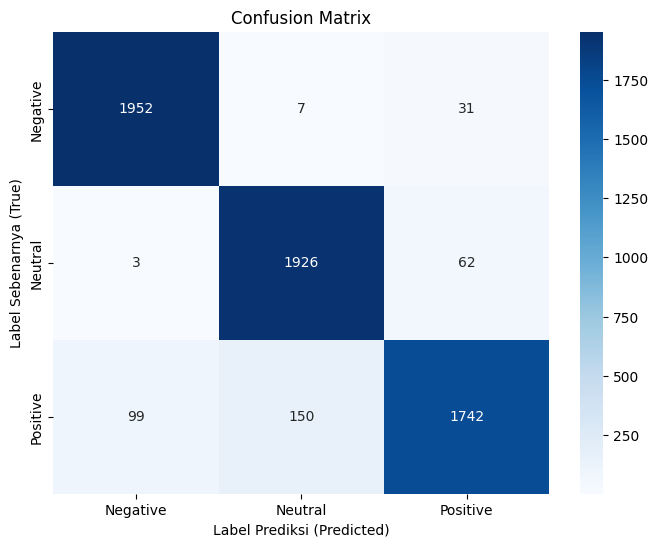

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, TFBertModel
from tf_keras.layers import Input, LSTM, Bidirectional, Dense, Dropout
from tf_keras.models import Model

# ==============================================================================
# 1. KONFIGURASI (Harus Sama dengan Skrip Pelatihan)
# ==============================================================================
MODEL_NAME = 'bert-base-multilingual-cased'
MAX_LENGTH = 128

# Sesuaikan path ini dengan struktur di Google Drive Anda
DATASET_DIR = 'dataset'
SAVED_MODELS_DIR = 'saved_models'
SAVED_MODELS_DIR = os.path.join(BASE_DIR, 'saved_models')
TRAIN_FILE = 'train_balanced_3class.csv'

# ==============================================================================
# 2. MEMUAT ARTEFAK & DATA
# ==============================================================================
print("Memuat tokenizer, label encoder, dan data...")

# Muat tokenizer
tokenizer_path = os.path.join(SAVED_MODELS_DIR, 'tokenizer_3class')
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)

# Muat label encoder
with open(os.path.join(SAVED_MODELS_DIR, 'label_encoder_3class.pkl'), 'rb') as f:
    label_encoder = pickle.load(f)
num_classes = len(label_encoder.classes_)

# Muat data dan lakukan split yang sama persis seperti saat training
df = pd.read_csv(os.path.join(DATASET_DIR, TRAIN_FILE))
df.dropna(inplace=True)

# Lakukan train-test split dengan random_state yang sama untuk memastikan set validasi identik
_, df_val = train_test_split(
    df,
    test_size=0.1,
    random_state=42,
    stratify=df['label']
)

print(f"Jumlah data validasi untuk evaluasi: {len(df_val)}")

# ==============================================================================
# 3. MEMBANGUN ULANG MODEL & MEMUAT BOBOT TERBAIK
# ==============================================================================
print("Membangun ulang arsitektur model...")

# Arsitektur harus sama persis dengan yang digunakan saat training
input_ids = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name='attention_mask')
bert_model = TFBertModel.from_pretrained(MODEL_NAME, from_pt=True)
sequence_output = bert_model(input_ids, attention_mask=attention_mask).last_hidden_state
bilstm = Bidirectional(LSTM(64))(sequence_output)
dropout = Dropout(0.3)(bilstm)
dense_output = Dense(num_classes, activation='softmax')(dropout)
model = Model(inputs=[input_ids, attention_mask], outputs=dense_output)

# Muat bobot terbaik yang disimpan oleh ModelCheckpoint
model_weights_path = os.path.join(SAVED_MODELS_DIR, 'mbert_lstm_3class.h5')
model.load_weights(model_weights_path)
print("Bobot model terbaik berhasil dimuat.")

# ==============================================================================
# 4. MELAKUKAN PREDIKSI PADA DATA VALIDASI
# ==============================================================================
print("Melakukan tokenisasi pada data validasi...")
X_val = tokenizer.batch_encode_plus(
    df_val['text'].tolist(),
    padding='max_length',
    truncation=True,
    max_length=MAX_LENGTH,
    return_tensors='tf'
)

print("Melakukan prediksi...")
y_pred_probs = model.predict({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']})
y_pred_encoded = np.argmax(y_pred_probs, axis=1)

# Ambil label asli untuk perbandingan
y_true_encoded = label_encoder.transform(df_val['label'])

# ==============================================================================
# 5. MENAMPILKAN HASIL EVALUASI
# ==============================================================================
print("\n" + "="*60)
print("                    LAPORAN HASIL KLASIFIKASI")
print("="*60)

# Menampilkan Laporan Klasifikasi
class_names = label_encoder.classes_
print(classification_report(y_true_encoded, y_pred_encoded, target_names=class_names))
print("="*60)

# Menampilkan Confusion Matrix
print("\nMenampilkan Confusion Matrix...")
cm = confusion_matrix(y_true_encoded, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya (True)')
plt.xlabel('Label Prediksi (Predicted)')
plt.show()